# Thinking Like A Scientist

## Developing Understanding from Data

### Tom Carpenter and Steve Elston

In [1]:
import pandas as pd
import numpy as np
import numpy.random as nr
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
#matplotlib inline

### Exercise 1.1 - Improving chance of wining Nobel prize

Is there anything you can do to improve your chances of wining a Nobel Prize? Let's have a look at the data and decide if this makes any sense?

To get started, execute the code in the cell below and examine the first 10 rows of the data frame.

In [2]:
Nobel_chocolate = pd.read_csv('nobel-chocolate.csv', thousands=',')
print('Dimensions of the data frame = ', Nobel_chocolate.shape)
Nobel_chocolate.head(10)

Dimensions of the data frame =  (19, 5)


,Country,Laureates10_million,Chocolate,Nobellaureates,Population
0,Switzerland,32.771,8.8,28,8544034
1,Sweden,30.052,8.1,30,9982709
2,Austria,25.138,7.9,22,8751820
3,Denmark,24.329,7.9,14,5754356
4,Norway,24.284,6.6,13,5353363
5,Ireland,14.572,5.8,7,4803748
6,Germany,13.245,5.7,109,82293457
7,United States,11.721,5.6,383,326766748
8,France,10.664,5.4,70,65233271
9,Finland,9.021,5.0,5,5542517


To get a feel for these data, create a scatter plot of Nobel prizes vs. chocolate consumption by executing the code in the cell below. 

Text(0.5, 1.0, 'Nobel Prizes vs. Chocolate Consumption')

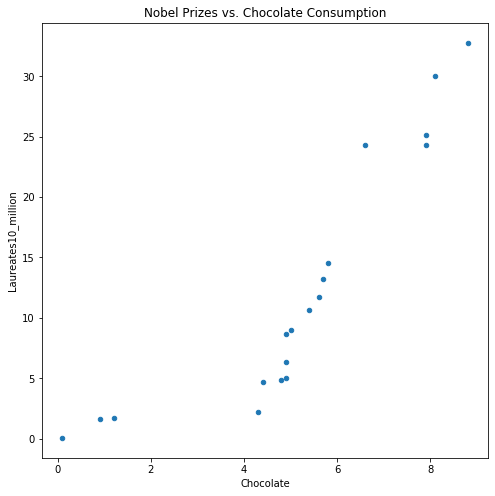

In [3]:
## Define a figure and axes and make a scatter plot
fig = plt.figure(figsize=(8, 8)) # define plot area
ax = fig.gca() # define axis 
Nobel_chocolate.plot.scatter('Chocolate', 'Laureates10_million', ax = ax) # Scatter plot
ax.set_title('Nobel Prizes vs. Chocolate Consumption') # Give the plot a main title

There seems to be one outlier in these data. The population of one country eats almost no chocolate and has low chances of an individual winning a Nobel prize. To find out which country, execute the code in the cell below.

In [4]:
min_row = Nobel_chocolate[Nobel_chocolate['Laureates10_million'].min() == Nobel_chocolate['Laureates10_million']]
print(min_row)

   Country  Laureates10_million  Chocolate  Nobellaureates  Population
18   China                0.064        0.1               9  1415045928


It appears that the large population of China lowers the chance of any one individual winning a Nobel prize. With all due respect to China, we need to remove this outlier from our dataset. Execute the code in the cell below to remove this row. 

In [5]:
Nobel_chocolate.drop(min_row.index[0], axis = 0, inplace = True)

As a next step, log transform the number of Nobel prizes and plot the results by executing the code in the cell below.

Text(0, 0.5, 'Log Nobel Prizes per 10 Million People')

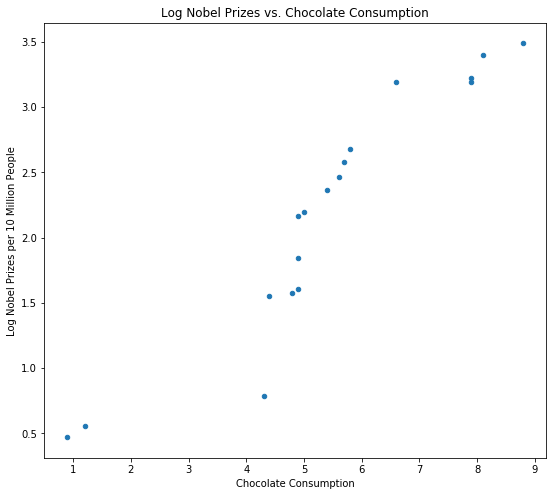

In [6]:
Nobel_chocolate['log_Nobel'] = np.log(Nobel_chocolate.Laureates10_million)

## PLot the log Nobel vs. chocolate
fig = plt.figure(figsize=(9, 8)) # define plot area
ax = fig.gca() # define axis 
Nobel_chocolate.plot.scatter('Chocolate', 'log_Nobel', ax = ax) # Scatter plot
ax.set_title('Log Nobel Prizes vs. Chocolate Consumption') # Give the plot a main title
ax.set_xlabel('Chocolate Consumption') # Set text for the x axis
ax.set_ylabel('Log Nobel Prizes per 10 Million People')# Set text for y axis

Wow! It really looks like anyone wanting to win a Nobel prize should eat as much chocolate as possible! But, do you think this relationship is really meaningful? Does eating chocolate really have anything to do with winning a Nobel prize or is there a latent variable here? 

### Exercise 1.2 - Regression of Nobel prizes vs. chocolate consumption

Can we find a model for chance of winning a Nobel prize vs. chocolate consumption.

In [7]:
y = np.array(Nobel_chocolate['log_Nobel'])
X = np.array(Nobel_chocolate['Chocolate'])
Nobel_OLS_model = sm.OLS(y, X).fit()
print(Nobel_OLS_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              905.1
Date:                Tue, 31 Dec 2019   Prob (F-statistic):                    3.48e-16
Time:                        11:05:16   Log-Likelihood:                         -5.1724
No. Observations:                  18   AIC:                                      12.34
Df Residuals:                      17   BIC:                                      13.24
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\StevePC2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


Text(0, 0.5, 'Log Nobel Prizes per 10 Million People')

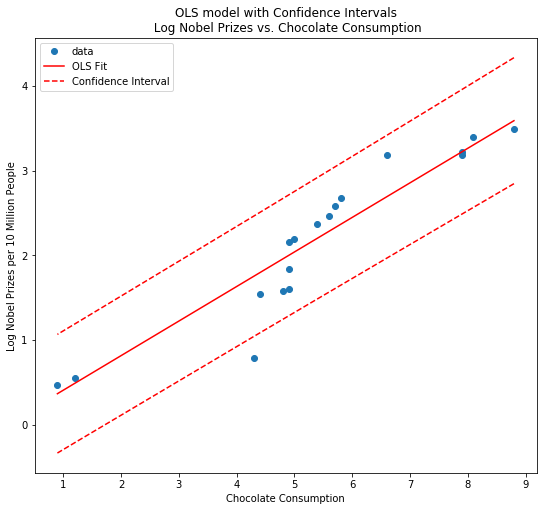

In [8]:
## Find the upper and lower confidence intervals for the OLS regression model
prediction_std, conf_interval_l, conf_interval_u = wls_prediction_std(Nobel_OLS_model)

## Plot the model predictions with the confidence intervals
fig, ax = plt.subplots(figsize=(9,8))
ax.plot(Nobel_chocolate['Chocolate'], y, 'o', label="data")
ax.plot(Nobel_chocolate['Chocolate'], Nobel_OLS_model.fittedvalues, 'r', label="OLS Fit")
ax.plot(Nobel_chocolate['Chocolate'], conf_interval_u, 'r--', label='Confidence Interval')
ax.plot(Nobel_chocolate['Chocolate'], conf_interval_l, 'r--')
ax.legend(loc='best')
ax.set_title('OLS model with Confidence Intervals\n Log Nobel Prizes vs. Chocolate Consumption') # Give the plot a main title
ax.set_xlabel('Chocolate Consumption') # Set text for the x axis
ax.set_ylabel('Log Nobel Prizes per 10 Million People') # Set text for y axis

### Example 1.3 - Is there a latent variable?

Perhaps, chocolate consumption is not the best predictor of Nobel prizes. Maybe GDP per person is a better predictor. 

Load the dataset containing the country name and GDP in billions of US dollars.

In [9]:
GDP = pd.read_csv('GDP_Country.csv')
print(GDP)

           Country  GDP_billions
0      Switzerland           679
1           Sweden           538
2          Austria           417
3          Denmark           325
4           Norway           399
5          Ireland           334
6          Germany          3677
7    United States         19390
8           France          2583
9          Finland           252
10         Belgium           493
11     New Zealand           206
12          Poland           525
13       Australia          1323
14  Czech Republic           216
15           Japan          4872
16    South Africa           349
17          Russia          1578


In [10]:
Nobel_chocolate = Nobel_chocolate.merge(right=GDP, how='left', left_on='Country', right_on='Country')
Nobel_chocolate['GDP_person_thousands'] = 1000000 * np.divide(Nobel_chocolate.GDP_billions, Nobel_chocolate.Population)
Nobel_chocolate

,Country,Laureates10_million,Chocolate,Nobellaureates,Population,log_Nobel,GDP_billions,GDP_person_thousands
0,Switzerland,32.771,8.8,28,8544034,3.489544,679,79.470658
1,Sweden,30.052,8.1,30,9982709,3.402929,538,53.893187
2,Austria,25.138,7.9,22,8751820,3.224381,417,47.647232
3,Denmark,24.329,7.9,14,5754356,3.191669,325,56.478953
4,Norway,24.284,6.6,13,5353363,3.189818,399,74.532588
5,Ireland,14.572,5.8,7,4803748,2.679102,334,69.529043
6,Germany,13.245,5.7,109,82293457,2.583620,3677,44.681560
7,United States,11.721,5.6,383,326766748,2.461382,19390,59.338963
8,France,10.664,5.4,70,65233271,2.366874,2583,39.596359
9,Finland,9.021,5.0,5,5542517,2.199555,252,45.466708


Text(0, 0.5, 'Log Nobel Prizes per 10 Million People')

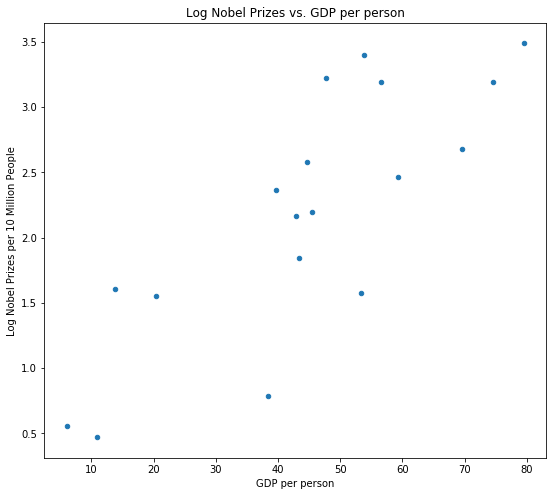

In [11]:
## PLot the log Nobel vs. GDP
fig = plt.figure(figsize=(9, 8)) # define plot area
ax = fig.gca() # define axis 
Nobel_chocolate.plot.scatter('GDP_person_thousands', 'log_Nobel', ax = ax) # Scatter plot
ax.set_title('Log Nobel Prizes vs. GDP per person') # Give the plot a main title
ax.set_xlabel('GDP per person') # Set text for the x axis
ax.set_ylabel('Log Nobel Prizes per 10 Million People')# Set text for y axis

In [12]:
X = np.array(Nobel_chocolate['GDP_person_thousands'])
Nobel_OLS_model_GDP = sm.OLS(y, X).fit()
print(Nobel_OLS_model_GDP.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              252.0
Date:                Tue, 31 Dec 2019   Prob (F-statistic):                    1.26e-11
Time:                        11:05:18   Log-Likelihood:                         -16.262
No. Observations:                  18   AIC:                                      34.52
Df Residuals:                      17   BIC:                                      35.41
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0, 0.5, 'Log Nobel Prizes per 10 Million People')

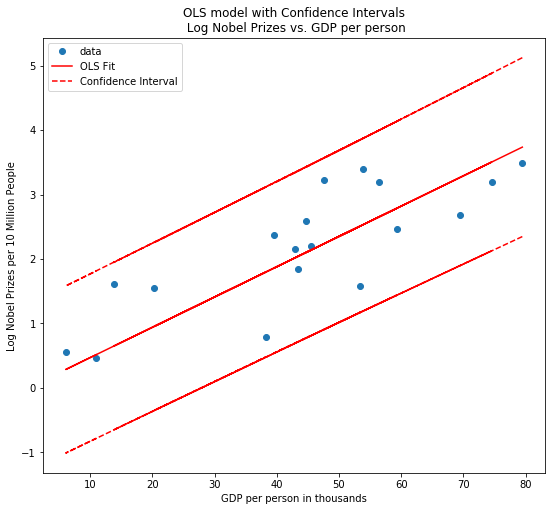

In [13]:
## Find the upper and lower confidence intervals for the OLS regression model
prediction_std, conf_interval_l, conf_interval_u = wls_prediction_std(Nobel_OLS_model_GDP)

## Plot the model predictions with the confidence intervals
fig, ax = plt.subplots(figsize=(9,8))
ax.plot(Nobel_chocolate['GDP_person_thousands'], y, 'o', label="data")
ax.plot(Nobel_chocolate['GDP_person_thousands'], Nobel_OLS_model_GDP.fittedvalues, 'r', label="OLS Fit")
ax.plot(Nobel_chocolate['GDP_person_thousands'], conf_interval_u, 'r--', label='Confidence Interval')
ax.plot(Nobel_chocolate['GDP_person_thousands'], conf_interval_l, 'r--')
ax.legend(loc='best')
ax.set_title('OLS model with Confidence Intervals\n Log Nobel Prizes vs. GDP per person') # Give the plot a main title
ax.set_xlabel('GDP per person in thousands') # Set text for the x axis
ax.set_ylabel('Log Nobel Prizes per 10 Million People') # Set text for y axis

### Exercise 1.4 - Is GDP a predictor of chocolate consumption?

To gain some an additional insight, it is useful to determine if there is a relationship between GDP and chocolate consumption.   

In [14]:
y = np.array(Nobel_chocolate['Chocolate'])
X = np.array(Nobel_chocolate['GDP_person_thousands'])
Chocolate_GDP_OLS_model = sm.OLS(y, X).fit()
print(Chocolate_GDP_OLS_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              235.7
Date:                Tue, 31 Dec 2019   Prob (F-statistic):                    2.14e-11
Time:                        11:05:18   Log-Likelihood:                         -32.783
No. Observations:                  18   AIC:                                      67.57
Df Residuals:                      17   BIC:                                      68.46
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0, 0.5, 'Choclate consumption')

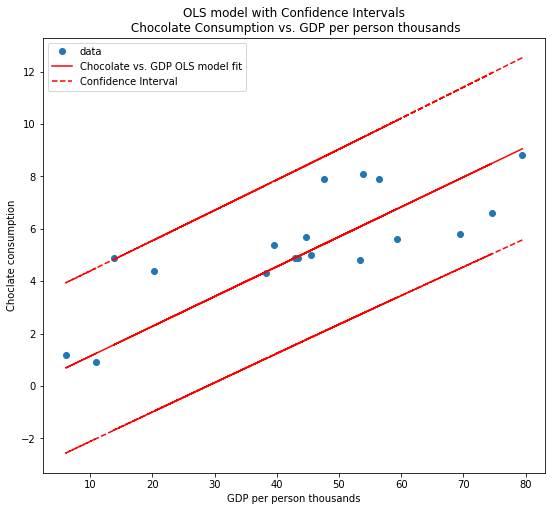

In [15]:
## Find the upper and lower confidence intervals for the OLS regression model
prediction_std, conf_interval_l, conf_interval_u = wls_prediction_std(Chocolate_GDP_OLS_model)

## Plot the model predictions with the confidence intervals
fig, ax = plt.subplots(figsize=(9,8))
ax.plot(Nobel_chocolate['GDP_person_thousands'], y, 'o', label="data")
ax.plot(Nobel_chocolate['GDP_person_thousands'], Chocolate_GDP_OLS_model.fittedvalues, 'r', label="Chocolate vs. GDP OLS model fit")
ax.plot(Nobel_chocolate['GDP_person_thousands'], conf_interval_u, 'r--', label='Confidence Interval')
ax.plot(Nobel_chocolate['GDP_person_thousands'], conf_interval_l, 'r--')
ax.legend(loc='best')
ax.set_title('OLS model with Confidence Intervals\n Chocolate Consumption vs. GDP per person thousands') # Give the plot a main title
ax.set_xlabel('GDP per person thousands') # Set text for the x axis
ax.set_ylabel('Choclate consumption') # Set text for y axis

###  Exercise 2.1 - 

How confident are we in the coefficients computed with the OLS regression model? In other words, how confident are we in our estimate of an effect? 

We can measure the variation of an effect by size by the range of the confidence interval of the regression coefficient. There are several ways one can find these confidence intervals. An estimate of the confidence intervals, based on a Normal distribution model, is given in the model summary report. A more robust approach is to find the confidence intervals based on the **bootstrap distribution** of the model coefficient. 

The code in the cell below computes bootstrap samples of the slope coefficient (effect size) for the regression model. 

In [16]:
def bootstrap_effect(X,Y,nsamps = 5000):
    coefficient_samples = []
    ndata = len(Y)
    for _ in range(nsamps):
        sample_index = nr.choice(range(ndata), size=ndata, replace=True)
        model = sm.OLS(Y[sample_index], X[sample_index]).fit()
        coefficient_samples.append(model._results.params[0])        
    return coefficient_samples

def bootstrap_CIs(samples, alpha = 0.05):
    alpha_half = alpha/2.0
    nsamples = len(samples)
    low_ci_index = int(alpha_half * nsamples)
    high_ci_index = nsamples - low_ci_index
    samples.sort()
    lci, uci = samples[low_ci_index], samples[high_ci_index]
    print('Confidence intervals of slope coefficient for alpha = ', alpha)
    print('Loweer confidence interval = ', lci)
    print('Upper confidence interval = ', uci)
    return lci, uci

X = np.array(Nobel_chocolate['GDP_person_thousands'])
Y = np.array(Nobel_chocolate['log_Nobel'])
boostrap_samples = bootstrap_effect(X, Y)
LCI, UCI = bootstrap_CIs(boostrap_samples) 


Confidence intervals of slope coefficient for alpha =  0.05
Loweer confidence interval =  0.042114977846806144
Upper confidence interval =  0.053133409283598845


Text(0, 0.5, 'Counts')

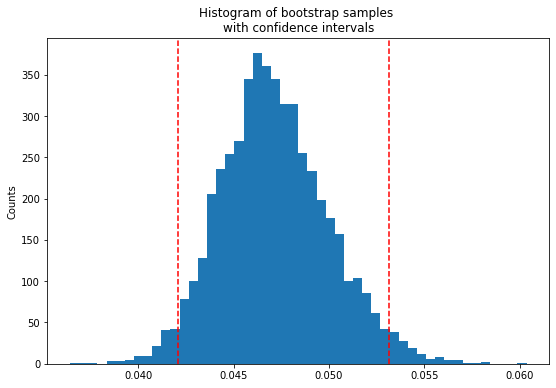

In [17]:
## Plot the model predictions with the confidence intervals
fig, ax = plt.subplots(figsize=(9,6))
ax.hist(boostrap_samples, bins = 50)
ax.axvline(LCI, linestyle='--', c='r')
ax.axvline(UCI, linestyle='--', c='r')

ax.set_title('Histogram of bootstrap samples \nwith confidence intervals')
ax.set_ylabel('Model coefficient') # Set text for x axis
ax.set_ylabel('Counts') # Set text for y axis

## 3.0 Multiple Hypothesis Testing

Testing multiple hypothesis from the same data can be problematic. The chance of finding false significance can be surprisingly high. 

To illustrate this, consider applying a t-test to multiple identical Normally distributed variables. In this case, we will create a data set with 20 independently identically distributed (iid) Normal distributions of 1000 samples each.  

In [18]:
ncolumns = 20
nr.seed(234)
normal_vars = nr.normal(size=(1000,ncolumns))
print('The means of the columns are\n', np.mean(normal_vars, axis = 0))
print('\nThe variances of the columns are\n', np.var(normal_vars, axis = 0))

The means of the columns are
 [-1.16191649e-01  2.80829317e-02 -1.78516419e-02 -1.44691489e-02
  3.03718152e-02  1.20007442e-02 -9.58845606e-05  1.98662580e-03
  4.94154934e-02 -4.11640866e-02 -6.32977862e-03 -5.93868192e-02
 -2.56373595e-02  1.43568791e-02 -1.44725765e-02 -1.37023955e-02
  1.80622439e-02  5.87029691e-02 -2.02650514e-02 -1.56346106e-02]

The variances of the columns are
 [0.94834508 1.04744241 1.0258018  0.96977571 1.0089001  1.04113864
 1.00657222 0.99192594 1.04713487 1.04329434 1.04023108 0.96791346
 1.03706907 1.07179865 1.01431404 1.05060289 1.02054329 0.9686211
 1.02810287 0.99521555]


Notice that means and variances are close to 0.0 and 1.0. There is not much difference between these variables. 

Now for each pair of variables we will compute the t-statistic and p-value and append them to lists.

In [19]:
from scipy.stats import ttest_ind, f_oneway
from itertools import product
#ttest_results = np.zeros((ncolumns*ncolumns,2))
ttest_results = []
p_values = []
for i,j in product(range(ncolumns),range(ncolumns)):
    if(i != j): # We only want to test between different samples 
        t1, t2 = ttest_ind(normal_vars[:,i], normal_vars[:,j])
        ttest_results.append(t1)
        p_values.append(t2)

How many of these t-tests would show **significance**. To find out, filter the test results and print results that show significance. 

In [20]:
signifiance_level = 0.05
def find_significant(p_values, ttest_results, signifiance_level):
    n_cases = 0
    for i in range(len(p_values)):
        if(p_values[i] < signifiance_level): 
            n_cases += 1
            print('t-test with SIGNIFICANT, t-statistic = ', round(ttest_results[i],2), ' and p-value = ', round(p_values[i],4))
    print('\nNumber of falsely significant tests = ', n_cases)        
find_significant(p_values, ttest_results, signifiance_level)        

t-test with SIGNIFICANT, t-statistic =  -3.23  and p-value =  0.0013
t-test with SIGNIFICANT, t-statistic =  -2.21  and p-value =  0.0271
t-test with SIGNIFICANT, t-statistic =  -2.32  and p-value =  0.0204
t-test with SIGNIFICANT, t-statistic =  -3.31  and p-value =  0.0009
t-test with SIGNIFICANT, t-statistic =  -2.87  and p-value =  0.0041
t-test with SIGNIFICANT, t-statistic =  -2.62  and p-value =  0.0087
t-test with SIGNIFICANT, t-statistic =  -2.68  and p-value =  0.0074
t-test with SIGNIFICANT, t-statistic =  -3.71  and p-value =  0.0002
t-test with SIGNIFICANT, t-statistic =  -2.46  and p-value =  0.0139
t-test with SIGNIFICANT, t-statistic =  -2.03  and p-value =  0.0424
t-test with SIGNIFICANT, t-statistic =  -2.9  and p-value =  0.0037
t-test with SIGNIFICANT, t-statistic =  -2.29  and p-value =  0.0218
t-test with SIGNIFICANT, t-statistic =  -2.29  and p-value =  0.0221
t-test with SIGNIFICANT, t-statistic =  -3.02  and p-value =  0.0025
t-test with SIGNIFICANT, t-statisti

Notice the large number of apparently significant tests. Do you trust these results to show any important relationships in the data? 

Can the Bonforoni correction help? Let's give it a try?

In [21]:
signifiance_bonforoni = signifiance_level/380.0
print('With Bonforoni correction the significance level is now = ', signifiance_bonforoni)
find_significant(p_values, ttest_results, signifiance_bonforoni)  

With Bonforoni correction the significance level is now =  0.00013157894736842105
t-test with SIGNIFICANT, t-statistic =  -3.99  and p-value =  0.0001
t-test with SIGNIFICANT, t-statistic =  3.99  and p-value =  0.0001

Number of falsely significant tests =  2


Even with the Bonforoni correction we have some false significance tests, if only just barely!

But, can we detect small effect with Bonforoni correction?

In [22]:
nr.seed(567)
ttest_ind(normal_vars[:,0], nr.normal(loc = 0.01, size=(1000,1)))

Ttest_indResult(statistic=array([-2.49553488]), pvalue=array([0.01265684]))


What do the confidence intervals for the difference of means tell us? 

In [23]:
def bootstrap_CIs_2(samples, alpha = 0.05):
    alpha_half = alpha/2.0
    nsamples = len(samples)
    low_ci_index = int(alpha_half * nsamples)
    high_ci_index = nsamples - low_ci_index
    samples.sort()
    lci, uci = samples[low_ci_index], samples[high_ci_index]
    return np.mean(samples), lci, uci

def bootstrap_diffs(X,Y,nsamps = 1000):
    coefficient_samples = []
    ndata = len(Y)
    diffs = []
    for _ in range(nsamps):
        sample_index = nr.choice(range(ndata), size=ndata, replace=True)
        diffs.append(np.mean(Y[sample_index]) - np.mean(X[sample_index]))   
    return diffs

def boot_diff_of_means(vars, nsamps=1000, alpha=0.5):
    mean_diffs = []
    LCIs = []
    UCIs = []
    for i,j in product(range(ncolumns),range(ncolumns)):
        if(i != j):
            diffs = bootstrap_diffs(vars[:,i], vars[:,j], nsamps=nsamps)
            mean_diff, lci, uci =  bootstrap_CIs_2(diffs, alpha=alpha)  
            mean_diffs.append(mean_diff)
            LCIs.append(lci)
            UCIs.append(uci)
    return mean_diffs, LCIs, UCIs

diff_of_means, LCIs, UCIs = boot_diff_of_means(normal_vars)

Text(0, 0.5, 'Counts')

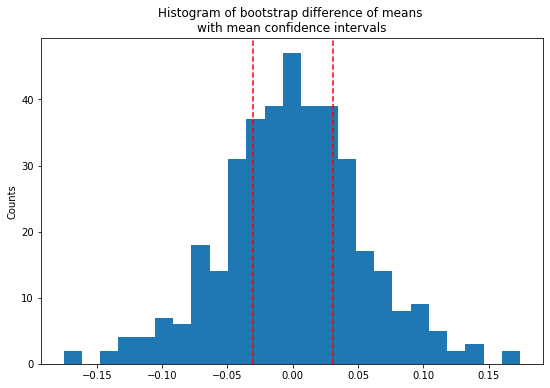

In [29]:
## Plot the model predictions with the confidence intervals
fig, ax = plt.subplots(figsize=(9,6))
ax.hist(diff_of_means, bins = 25)
ax.axvline(np.mean(LCIs), linestyle='--', c='r')
ax.axvline(np.mean(UCIs), linestyle='--', c='r')

ax.set_title('Histogram of bootstrap difference of means \nwith mean confidence intervals')
ax.set_ylabel('Difference of means') # Set text for x axis
ax.set_ylabel('Counts') # Set text for y axis

In [33]:
effect_threshold = 0.1
def find_bootstrap_significant(mean_values, LCIs, UCIs, effect_threshold):
    n_cases = 0
    for i in range(len(p_values)):
        ## Test if upper and lower CIs both have the same sign, indicating significance.                
        if(abs(mean_values[i]) > effect_threshold and ((LCIs[i] > 0.0 and UCIs[i] > 0.0) or (LCIs[i] < 0.0 and UCIs[i] < 0.0))): 
            n_cases += 1
            print('CIs do not include zero; mean = ', round(mean_values[i], 3), 
                  ' , Lower CI = ', round(LCIs[i], 3), ' , Upper CI = ', round(UCIs[i], 3))
    print('\nNumber of falsely significant tests = ', n_cases)        
find_bootstrap_significant(diff_of_means, LCIs, UCIs, effect_threshold) 

CIs do not include zero; mean =  0.143  , Lower CI =  0.113  , Upper CI =  0.173
CIs do not include zero; mean =  0.101  , Lower CI =  0.07  , Upper CI =  0.129
CIs do not include zero; mean =  0.142  , Lower CI =  0.113  , Upper CI =  0.172
CIs do not include zero; mean =  0.13  , Lower CI =  0.098  , Upper CI =  0.161
CIs do not include zero; mean =  0.116  , Lower CI =  0.083  , Upper CI =  0.149
CIs do not include zero; mean =  0.117  , Lower CI =  0.086  , Upper CI =  0.149
CIs do not include zero; mean =  0.164  , Lower CI =  0.133  , Upper CI =  0.197
CIs do not include zero; mean =  0.108  , Lower CI =  0.081  , Upper CI =  0.136
CIs do not include zero; mean =  0.127  , Lower CI =  0.094  , Upper CI =  0.158
CIs do not include zero; mean =  0.101  , Lower CI =  0.071  , Upper CI =  0.131
CIs do not include zero; mean =  0.103  , Lower CI =  0.073  , Upper CI =  0.134
CIs do not include zero; mean =  0.136  , Lower CI =  0.106  , Upper CI =  0.165
CIs do not include zero; mean 

Would ANOVA work better? Let's give it a try for the first 10 columns of the data frame.

In [25]:
f_oneway(normal_vars[:,0],normal_vars[:,1],normal_vars[:,2],normal_vars[:,3],normal_vars[:,4],normal_vars[:,5],normal_vars[:,6],normal_vars[:,7],normal_vars[:,8],normal_vars[:,9])

F_onewayResult(statistic=2.143527277355356, pvalue=0.022915451627654522)

### Power of Tests

The **power of a test** is formally defined as:

$$power = P(reject\ H_0| when\ H_a\ is\ true)$$

In pain language, the power is the probability of getting a positive result when the null hypothesis is not true. Conversely, a test with insuficient power will not detect a real effect. Clearly, we want the most powerful test we can find for the situation. 

Computing test power can be a bit complex, and analytical solutions can be dificult or impossible. Often, a simulation is used to compute power. 

Let's look at the example of compution power for the two sample t-test for the difference of means. The power of this test depends on the several parameters:

- The number of samples.
- The anticipated difference in the population means, which we call the **effect**.
- The significance level of  the test.
- The type of test.

When running a power test, you can ask several questions, which will assist you in designing an experiement. Usually, you will determine how big a sample you need to have good chance of rejecting the null hypothesis. You can also determine how big an effect needs to be given a fixed sample size (all the samples you have or can afford) to have a good chance of rejecting the null hypothesis. 

The Python `statsmodels` package provides power calculations for a limited set of hypothesis tests. We can use these capabilities to examine the powerr

The code in the cell below does the following:

- Create a sequene of effect sizes.
- Compute a vector of power values for the effect size.
- Plot the effect size vs. power. 

Execute this code and examine the result. 

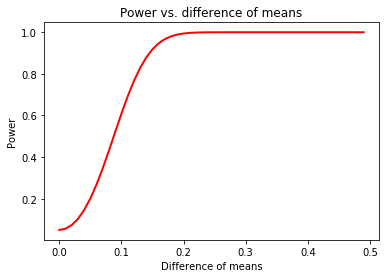

In [26]:
import statsmodels.stats.power as smsp
nr.seed(seed=23344)
diffs = np.arange(start = 0.0, stop = 0.5, step = .01)
powers = [smsp.tt_ind_solve_power(effect_size = x, nobs1 = 1000, 
           alpha = 0.05, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in diffs]

def plot_power(x, y, xlabel, title):
    import matplotlib.pyplot as plt
    plt.plot(x, y, color = 'red', linewidth = 2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Power')
plot_power(diffs, powers, xlabel = 'Difference of means', title = 'Power vs. difference of means')    

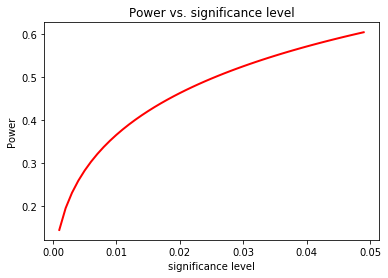

In [27]:
nr.seed(seed=1234)
alphas = np.arange(start = 0.001, stop = 0.05, step = .001)
powers = [smsp.tt_ind_solve_power(effect_size = 0.1, nobs1 = 1000, 
           alpha = x, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in alphas]

def plot_power(x, y, xlabel, title):
    import matplotlib.pyplot as plt
    plt.plot(x, y, color = 'red', linewidth = 2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Power')
plot_power(alphas, powers, xlabel = 'significance level', title = 'Power vs. significance level')    

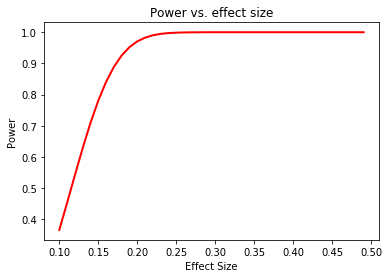

In [28]:
nr.seed(seed=1234)
effect_size = np.arange(start = 0.1, stop = 0.5, step = .01)
powers = [smsp.tt_ind_solve_power(effect_size = x, nobs1 = 1000, 
           alpha = 0.01, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in effect_size]

def plot_power(x, y, xlabel, title):
    import matplotlib.pyplot as plt
    plt.plot(x, y, color = 'red', linewidth = 2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Power')
plot_power(effect_size, powers, xlabel = 'Effect Size', title = 'Power vs. effect size')    

#### Copyright 2019, 2020, Tom Phillip Carpenter, Stephen F Elston. All rights reserved. 